In [4]:
import time
import pandas as pd
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from dnn_app_utils_v3 import *
from dnn_utils_v2 import sigmoid, sigmoid_backward, relu, relu_backward
import sklearn
import sklearn.datasets
import sklearn.linear_model


import csv
np.random.seed(1)

In [5]:
import tensorflow as tf


In [6]:
#import tensorflow as tf
#from tf import keras
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from sklearn.utils import shuffle
from keras.layers import Dense

Using TensorFlow backend.


In [7]:
from keras.models import Sequential
import tensorflow as tf

In [8]:
filname = 'fer.csv'
label_map = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
names=['emotion','pixels','usage']
df=pd.read_csv('fer.csv',names=names, na_filter=False)
im=df['pixels']
df.head(10)
#df=pd.read_csv(filname, index=False)  


,emotion,pixels,usage
0,emotion,pixels,Usage
1,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
2,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
3,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
4,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
5,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
6,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
7,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
8,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
9,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training


In [9]:
def linear_forword(A,w,b):
    
    Z=np.dot(w,A)+b
    assert(Z.shape==(w.shape[0],A.shape[1]))
    cache=(A,w,b)
    return Z,cache

In [10]:
def initialize_parameters(n_x,n_h,n_y):
    
    ###here we conder to initialize the parameter#####
    w1=np.random.randn(n_h,n_x)*0.01
    b1=np.zeros((n_h,1))
    w2=np.random.randn(n_y,n_h)*0.01
    b2=np.zeros((n_y,1))
    
    ##HERE WE CHECK THE PARAMTERS
    assert(w1.shape==(n_h,n_x))
    assert(b1.shape==(n_h,1))
    assert(w2.shape==(n_y,n_h))
    assert(b2.shape==(n_y,1))
    
    parameters={"W1":w1,
               "b1":b1,
               "W2":w2,
               "b2":b2}
    return parameters
    
    
    

In [11]:
def L_model_forward(X, parameters):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()
    
    Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_relu_forward() (there are L-1 of them, indexed from 0 to L-2)
                the cache of linear_sigmoid_forward() (there is one, indexed L-1)
    """

    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation = "relu")
        caches.append(cache)
    
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation = "sigmoid")
    caches.append(cache)
    
    assert(AL.shape == (7,X.shape[1]))
            
    return AL, caches

In [12]:
def L_model_backward(AL, Y, caches):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group
    
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (there are (L-1) or them, indexes from 0 to L-2)
                the cache of linear_activation_forward() with "sigmoid" (there is one, index L-1)
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    
    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "AL, Y, caches". Outputs: "grads["dAL"], grads["dWL"], grads["dbL"]
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, activation = "sigmoid")
    
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 1)], current_cache, activation = "relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

In [26]:
parameters = initialize_parameters(n_x,n_h,n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))
#print(parameters["b2"].shape)
#print(X_flatten.shape)

W1 = [[-0.01339934  0.01724182 -0.00906879 ...  0.00586094 -0.02125627
  -0.00798332]
 [ 0.00954558  0.00953945  0.00237057 ... -0.0039777   0.00569282
  -0.01299136]
 [-0.00790335  0.00273957 -0.00834906 ... -0.00750878  0.00611081
  -0.0030769 ]
 ...
 [-0.01704953 -0.00718631 -0.00027193 ... -0.0005765   0.01478464
   0.00978057]
 [-0.02069021 -0.00328228 -0.00733963 ...  0.00041358 -0.00578984
  -0.01846499]
 [-0.00386075  0.00187046  0.00195967 ...  0.0130214  -0.01111787
  -0.01526415]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-3.62582218e-03 -1.97711807e-02 -6.61621550e-03 -3.32552049e-03
  -1.84098939e-02  2.60213980e-03 -8.83544875e-03 -7.04318749e-03
   8.46770212e-03  4.49357051e-04  8.80838734e-03  1.54693706e-02
  -3.21744155e-03  1.42720128e-03 -1.87106094e-02  5.42606416e-03
   4.95196336e-03 -4.57669727e-03 -3.91684736e-03 -1.10886386e-02]
 [ 5.80144562e-03  1.18217881e-02  5.5254

In [13]:
def linear_activation_forword(A_prev,w,b,activation):
    
    ##WE HAVE FOUND THE ACTIVATION WITH THE RESTRICTION
    if activation=="sigmoid":
        Z,linear_cache=linear_forword(A_prev,w,b)
        A,activation_cache=sigmoid(Z)
    ##IF THE ACTIVATION IS RELU THEN
    elif activation=="relu":
        Z,linear_cache=linear_forword(A_prev,w,b)
        A,activation_cache=relu(Z)
    
    ##VERYFYING THE SHAPE OF ACTIVATION USING ASSERT
    assert(A.shape==(w.shape[0],A_prev.shape[1]))
    cache=(linear_cache,activation_cache)
    
    return A,cache 


In [14]:
def linear_backword(dz,cache):
    
    A_prev,w,b=cache
    m=A_prev.shape[1]
    ##HERE WE GO WITH BACKPROPAGATION
    dw=(1/m)*np.dot(dz,A_prev.T)
    db=(1/m)*np.sum(dz,axis=1,keepdims=True)
    dA_prev=np.dot(w.T,dz)
    
    assert(dw.shape==w.shape)
    assert(db.shape==b.shape)
    assert(dA_prev.shape==A_prev.shape)
    
    return dA_prev,dw,db
    


In [40]:
n_x=len(X_flatten)
n_h=20
n_y=7
layers_dims=(n_x,280,280,280,7)

In [15]:
def compute_cost(AL, Y):
    
    m=Y.shape[1]
    cost =-sum((Y*np.log(AL)+(1-Y)*(np.log(1-AL))).T)/m
    
    cost=np.squeeze(cost)
    cost=np.mean(cost)
    assert(cost.shape==())
    
    return cost     
    

In [16]:
def linear_activation_backword(dA,cache,activation):
    
    linear_cache,activation_cache=cache
    if activation=="sigmoid":
        dz=sigmoid_backward(dA,activation_cache)
        dA_prev,dw,db=linear_backword(dz,linear_cache)
    elif activation=="relu":
        dz=relu_backward(dA,activation_cache)
        dA_prev,dw,db=linear_backword(dz,linear_cache)
    
    return dA_prev,dw,db
    
    
    

In [17]:
def softmax_backward(dA, cache):
    """
    Implement the backward propagation for a single SIGMOID unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    
    e_x = np.exp(Z - np.max(Z))
    s=e_x / e_x.sum()
    dZ = dA * s * (1-s)
    
    assert (dZ.shape == Z.shape)
    
    return dZ


In [18]:
def update_parameters(parameters,grads,learning_rate):
    L=len(parameters)//2
    for  l in range(L):
        parameters["W"+str(l+1)]=parameters["W"+str(l+1)]- learning_rate*grads["dW"+str(l+1)]
        parameters["b"+str(l+1)]=parameters["b"+str(l+1)]- learning_rate*grads["db"+str(l+1)]
    
    return parameters
    

In [19]:
def two_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    
    costs=[]
    grad={}
    n_x,n_h,n_y=layers_dims
    
    ##INITIALIZE THE PARAMETERS
    parameters=initialize_parameters(n_x,n_h,n_y)
    ##here we introduce the parameters w1,w2,b1,b2
    w1=parameters["W1"]
    b1=parameters["b1"]
    w2=parameters["W2"]
    b2=parameters["b2"]
    
    ##AGAIN WE LOOP THE GRAD FUNCTION#################
    for i in range(0,num_iterations):
        
        A1,cache1=linear_activation_forword(X,w1,b1,activation="relu")
        A2,cache2=linear_activation_forword(A1,w2,b2,activation="sigmoid")
        
        ##COMPUTE COST 
        cost=compute_cost(A2,Y)
        
        ## INITIALIZE THE BACKWORD PAPAMWTERS
        dA2=-(np.divide(Y,A2)-np.divide(1-Y,1-A2))
        
        ## HERE WE INITIALIZE THE LINEAR BACKWORD PROPAGATION
        dA1,dw2,db2=linear_activation_backword(dA2,cache2,activation="sigmoid")
        dA2,dw1,db1=linear_activation_backword(dA1,cache1,activation="relu")
        
        ## set grads ['dW1'] to dw1, f=grads['db1']
        grad['dW1']=dw1
        grad['db1']=db1
        grad['dW2']=dw2
        grad['db2']=db2
        
        ## update the parameters
        parameters=update_parameters(parameters,grad,learning_rate)
        
        ## retrieve w1,w2,b1,b2 from the parameters
        w1=parameters['W1']
        b1=parameters['b1']
        w2=parameters['W2']
        b2=parameters['b2']
        
        ### print the cost every 100 training examples
        if print_cost and i%100==0:
            print("Cost after iteration {}: {}".format(i,cost))
        if print_cost and i%100==0:
            costs.append(cost)
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations(per hundreds)')
    plt.title("Learning rate= "+str(learning_rate))
    plt.show()
    return parameters
       

In [46]:
print(X_flatten.shape)

(2304, 1000)


Cost after iteration 0: 0.6895536371695783
Cost after iteration 100: 0.40065697332373723
Cost after iteration 200: 0.4000454332321901
Cost after iteration 300: 0.39958012237859775
Cost after iteration 400: 0.3991627568976041
Cost after iteration 500: 0.3987650156747267
Cost after iteration 600: 0.3983626248991311
Cost after iteration 700: 0.39793133169034167
Cost after iteration 800: 0.39744191169128384
Cost after iteration 900: 0.3968795000631452
Cost after iteration 1000: 0.39621699122368836
Cost after iteration 1100: 0.39544990252560525
Cost after iteration 1200: 0.3945825878902857
Cost after iteration 1300: 0.3936235968747722
Cost after iteration 1400: 0.3925860178478642
Cost after iteration 1500: 0.3914787268299736
Cost after iteration 1600: 0.39029292681540734
Cost after iteration 1700: 0.3890161902493109
Cost after iteration 1800: 0.38764298480477677
Cost after iteration 1900: 0.38615544257874607
Cost after iteration 2000: 0.38453770748025906
Cost after iteration 2100: 0.3827773

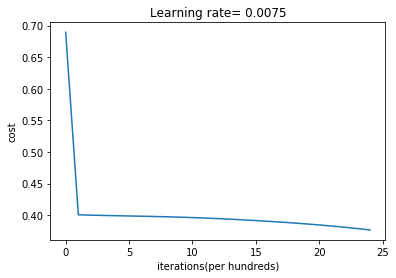

total time req:  32.41769099235535


In [37]:
tic=time.time()
parameters = two_layer_model(X_flatten, y_train, layers_dims = (n_x, n_h, n_y), num_iterations = 2500, print_cost=True)
toc=time.time()
print("total time req:  "+str(toc-tic))

In [38]:
parameters

{'W1': array([[-0.00067402, -0.01949861, -0.02079269, ..., -0.00174923,
          0.01600043,  0.00339189],
        [ 0.00480195, -0.01219562,  0.01734247, ...,  0.00126254,
          0.01382648,  0.01392761],
        [-0.00824572,  0.00417379,  0.01642583, ...,  0.00526723,
          0.00829986,  0.00219038],
        ...,
        [-0.00183854,  0.00666245,  0.00988344, ...,  0.02170238,
         -0.01089772,  0.00382333],
        [-0.00151399,  0.01042839,  0.01892174, ..., -0.00942909,
          0.00267178,  0.0047473 ],
        [ 0.00923514,  0.01220409, -0.00415769, ...,  0.0010394 ,
         -0.00870995,  0.01327389]]), 'b1': array([[ 0.1250677 ],
        [ 0.01779546],
        [-0.00338184],
        [ 0.02855776],
        [ 0.00015512],
        [ 0.04616518],
        [ 0.07131239],
        [ 0.07599112],
        [ 0.11427478],
        [ 0.05617942],
        [-0.00039103],
        [ 0.00851406],
        [ 0.07213206],
        [ 0.01214853],
        [ 0.00178083],
        [ 0.03638

In [47]:
ans=100-(cost)*100
print(abs(ans))

61.60933469610875


In [20]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    
    cache=X

    return e_x / e_x.sum(),cache

In [21]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):#lr was 0.009
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization. (≈ 1 line of code)
    ### START CODE HERE ###
    parameters = initialize_parameters_deep(layers_dims)
    ### END CODE HERE ###
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        ### START CODE HERE ### (≈ 1 line of code)
        AL, caches = L_model_forward(X, parameters)
        ### END CODE HERE ###
        
        # Compute cost.
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost(AL, Y)
        ### END CODE HERE ###
    
        # Backward propagation.
        ### START CODE HERE ### (≈ 1 line of code)
        grads = L_model_backward(AL, Y, caches)
        ### END CODE HERE ###
 
        # Update parameters.
        ### START CODE HERE ### (≈ 1 line of code)
        parameters = update_parameters(parameters, grads, learning_rate)
        ### END CODE HERE ###
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.663432
Cost after iteration 100: 0.395939
Cost after iteration 200: 0.391707
Cost after iteration 300: 0.387721
Cost after iteration 400: 0.383593
Cost after iteration 500: 0.379185
Cost after iteration 600: 0.374287
Cost after iteration 700: 0.368928
Cost after iteration 800: 0.363045
Cost after iteration 900: 0.360253
Cost after iteration 1000: 0.357295
Cost after iteration 1100: 0.352476
Cost after iteration 1200: 0.347513
Cost after iteration 1300: 0.341783
Cost after iteration 1400: 0.335259
Cost after iteration 1500: 0.329013
Cost after iteration 1600: 0.320910
Cost after iteration 1700: 0.314037
Cost after iteration 1800: 0.312344
Cost after iteration 1900: 0.299407
Cost after iteration 2000: 0.309004
Cost after iteration 2100: 0.292175
Cost after iteration 2200: 0.289097
Cost after iteration 2300: 0.272313
Cost after iteration 2400: 0.264222
Cost after iteration 2500: 0.270042
Cost after iteration 2600: 0.261964
Cost after iteration 2700: 0.269430
Cost

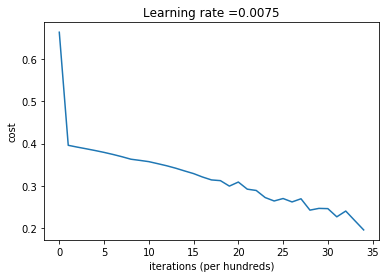

In [41]:
parameters = L_layer_model(X_flatten, y_train,layers_dims, num_iterations = 3500, print_cost = True)

In [42]:
parameters

{'W1': array([[ 0.04050372, -0.00715078, -0.00594132, ..., -0.01161518,
         -0.00402668, -0.01016653],
        [ 0.01513474,  0.01093978,  0.02269356, ...,  0.01783133,
          0.01586056,  0.02096258],
        [ 0.00811648,  0.023405  , -0.001555  , ...,  0.01096618,
          0.04325633, -0.03325882],
        ...,
        [ 0.00875761, -0.01378113,  0.00795377, ..., -0.03605861,
         -0.01347328,  0.00055279],
        [ 0.0060111 ,  0.0309008 ,  0.01869826, ...,  0.00782601,
          0.0760816 ,  0.00944814],
        [-0.02753885, -0.02175827,  0.00024241, ...,  0.00137795,
          0.01666784, -0.03436152]]), 'b1': array([[-8.44208548e-03],
        [ 6.60868904e-03],
        [ 3.80998183e-05],
        [-5.99925441e-03],
        [ 1.78504098e-02],
        [-5.57908985e-03],
        [ 3.02524313e-03],
        [ 1.87914705e-02],
        [ 8.26586271e-03],
        [ 2.68715795e-02],
        [-3.45183359e-03],
        [-2.74608333e-03],
        [ 0.00000000e+00],
        [ 4

In [22]:
objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
y_pos = np.arange(len(objects))
print(y_pos)

[0 1 2 3 4 5 6]


In [23]:
def emotion_analysis(emotions):
    objects = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
    y_pos = np.arange(len(objects))
    plt.bar(y_pos, emotions, align='center', alpha=0.9)
    plt.tick_params(axis='x', which='both', pad=10,width=4,length=10)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
plt.show()

In [48]:
print(parameters)

{'W1': array([[ 0.04050372, -0.00715078, -0.00594132, ..., -0.01161518,
        -0.00402668, -0.01016653],
       [ 0.01513474,  0.01093978,  0.02269356, ...,  0.01783133,
         0.01586056,  0.02096258],
       [ 0.00811648,  0.023405  , -0.001555  , ...,  0.01096618,
         0.04325633, -0.03325882],
       ...,
       [ 0.00875761, -0.01378113,  0.00795377, ..., -0.03605861,
        -0.01347328,  0.00055279],
       [ 0.0060111 ,  0.0309008 ,  0.01869826, ...,  0.00782601,
         0.0760816 ,  0.00944814],
       [-0.02753885, -0.02175827,  0.00024241, ...,  0.00137795,
         0.01666784, -0.03436152]]), 'b1': array([[-8.44208548e-03],
       [ 6.60868904e-03],
       [ 3.80998183e-05],
       [-5.99925441e-03],
       [ 1.78504098e-02],
       [-5.57908985e-03],
       [ 3.02524313e-03],
       [ 1.87914705e-02],
       [ 8.26586271e-03],
       [ 2.68715795e-02],
       [-3.45183359e-03],
       [-2.74608333e-03],
       [ 0.00000000e+00],
       [ 4.72217659e-02],
       [-

In [66]:
probas, caches = L_model_forward(test_x_flatten , parameters)

In [67]:
probas

array([[6.19515326e-03, 6.20128922e-01, 3.72406392e-01, ...,
        3.83190415e-01, 1.97736909e-01, 6.09627820e-01],
       [6.35264021e-03, 5.08124996e-02, 1.48646555e-02, ...,
        3.15728824e-02, 4.23928103e-02, 8.20574464e-03],
       [2.12094763e-02, 6.20131685e-02, 3.79701674e-02, ...,
        1.79402510e-01, 4.67608783e-02, 5.41731373e-01],
       ...,
       [1.22855384e-03, 1.62458146e-01, 2.11138510e-01, ...,
        3.70063764e-03, 1.14562891e-01, 4.19774066e-03],
       [5.76027432e-04, 1.58645513e-03, 3.77185684e-02, ...,
        2.94123037e-03, 1.01021335e-02, 6.34914487e-03],
       [1.67960336e-01, 1.78153045e-01, 2.02202179e-02, ...,
        2.19887063e-01, 3.81913960e-01, 1.71260356e-01]])

In [54]:
probas2, caches = L_model_forward(xt , parameters)

In [73]:

#print(max(z))
#print(z)
s=probas.T
print(s[50])

[0.41282157 0.01769451 0.07395695 0.01695823 0.01499041 0.23807296
 0.02670074]


In [51]:
an=y_train.T
print(an[14])

[0. 1. 0. 0. 0. 0. 0.]


In [75]:
tl=[9.46896717e-03, 8.96570081e-04, 8.57146958e-02, 4.00778873e-04,
  1.48176853e-01, 3.78748524e-02, 5.40069229e-01]

In [69]:
r=max(tl)
r=tl.index(r)

6

In [63]:
tl[3]

array([0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [71]:
label_map[6]

'Neutral'

In [10]:
import imageio

In [64]:
nu_pixels=48

In [52]:
from skimage import io
img = image.load_img('fear13.jpeg', grayscale=True, target_size=(48, 48))
#show_img=image.load_img('.image12.jpg', grayscale=False, target_size=(200, 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

/home/aman/anaconda3/lib/python3.7/site-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


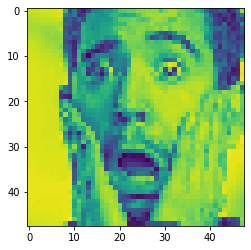

In [53]:
xt=x.reshape(1,nu_pixels*nu_pixels*1).T
plt.imshow(img)

In [112]:
my_image = "my_image.jpg" # change this to the name of your image file 
my_label_y = [1] # the true class of your image (1 -> cat, 0 -> non-cat)
## END CODE HERE ##

fname = "images/" + my_image
image = np.array(ndimage.imread(fname, flatten=False))
my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((num_px*num_px*3,1))
my_image = my_image/255.
my_predicted_image = predict(my_image, my_label_y, parameters)

plt.imshow(image)
print ("y = " + str(np.squeeze(my_predicted_image)) + ", your L-layer model predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

AttributeError: module 'scipy.ndimage' has no attribute 'imread'

In [111]:
Y=y_train.T
Y[100]

array([1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [24]:
def getData(filname):
    # images are 48x48
    # N = 35887
    Y = []
    X = []
    first = True
    for line in open(filname):
        if first:
            first = False
        else:
            row = line.split(',')
            Y.append(int(row[0]))
            X.append([int(p) for p in row[1].split()])

    X, Y = np.array(X) / 255.0 , np.array(Y)
    return X, Y


In [25]:
X, Y = getData(filname)
num_class = len(set(Y))
print(num_class)

7


In [27]:
Y

array([0, 0, 2, ..., 0, 3, 2])

In [28]:
X,Y=shuffle(X,Y)

In [29]:
N, D = X.shape
X = X.reshape(N, 48, 48, 1)

In [30]:
print(X.shape)

(35887, 48, 48, 1)


In [31]:
label_map[Y[0]]

'Anger'

it may take few min.....
##################################################################################################################################################################################################################################################################################################################
the person is:  Fear


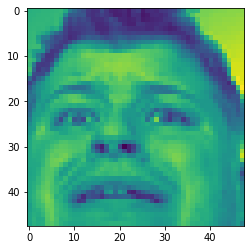

In [80]:
i=0
print("it may take few min.....")
for image_pixels in df.iloc[1:,1]: #column 2 has the pixels. Row 1 is column name.
    image_string = image_pixels.split(' ') #pixels are separated by spaces.
    image_data = np.asarray(image_string, dtype=np.uint8).reshape(48,48)
    #plt.imshow(img)
    #ans=input("Do you want to continue Y/N: ")
    #print("it may take few min.....")
    if(i%10):
        print("#",end="")
    time.sleep(0.05)
    if(i==340):
        
        img = Image.fromarray(image_data) 
        print("\nthe person is: ",str(label_map[Y[i]]))
        plt.imshow(img)
        plt.show()
        break
    i=i+1
    

In [62]:
X

array([[[[0.47843137],
         [0.41960784],
         [0.26666667],
         ...,
         [0.55294118],
         [0.64313725],
         [0.55686275]],

        [[0.4       ],
         [0.32156863],
         [0.33333333],
         ...,
         [0.55686275],
         [0.62352941],
         [0.56470588]],

        [[0.32156863],
         [0.31764706],
         [0.43529412],
         ...,
         [0.56862745],
         [0.6       ],
         [0.61568627]],

        ...,

        [[0.58431373],
         [0.5372549 ],
         [0.47058824],
         ...,
         [0.51764706],
         [0.54509804],
         [0.52156863]],

        [[0.6       ],
         [0.57254902],
         [0.5254902 ],
         ...,
         [0.50980392],
         [0.54509804],
         [0.55686275]],

        [[0.61960784],
         [0.59215686],
         [0.55294118],
         ...,
         [0.52941176],
         [0.54509804],
         [0.56078431]]],


       [[[0.59215686],
         [0.59215686],
         [0.64

it may take few min.....
#############################################################################################################################################################################################
the person is:  Happy


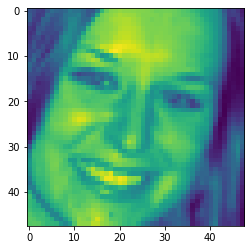

In [75]:
i=0
print("it may take few min.....")
for image_pixels in X: #column 2 has the pixels. Row 1 is column name.
    image_string = image_pixels*255  #pixels are separated by spaces.
    image_data = np.asarray(image_string, dtype=np.uint8).reshape(48,48)
    #plt.imshow(img)
    #ans=input("Do you want to continue Y/N: ")
    #print("it may take few min.....")
    if(i%10):
        print("#",end="")
    time.sleep(0.05)
    if(i==210):
        
        img = Image.fromarray(image_data) 
        print("\nthe person is: ",str(label_map[Y[i]]))
        plt.imshow(img)
        plt.show()
        break
    i=i+1
    

In [ ]:
i=0
probas, caches = L_model_forward(test_x_flatten , parameters)
l=probas.T
print("it may take few min.....")
for image_pixels in X_test: #column 2 has the pixels. Row 1 is column name.
    image_string = image_pixels*255  #pixels are separated by spaces.
    image_data = np.asarray(image_string, dtype=np.uint8).reshape(48,48)
    s=max(list(l[i]))
    t=0
    for i in l[i]:
        if(i==s):
            break
        t=t+1
    print("\nthe person is: ",str(label_map[t]))
    #plt.imshow(img)
    #ans=input("Do you want to continue Y/N: ")
    #print("it may take few min.....")
    img = Image.fromarray(image_data) 
    #print("\nthe person is: ",str(label_map[Y[i]]))
    plt.imshow(img)
    plt.show()
    
    
    n=int(input("Enter the value: "))
    



In [83]:
for i in X_test:
    print(i.shape)
    n=input("Enter the value: ")
    

(2304,)


KeyboardInterrupt: 

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
y_train = (np.arange(num_class) == y_train[:, None]).astype(np.float32)
y_test = (np.arange(num_class) == y_test[:, None]).astype(np.float32)

In [33]:
m2,nu_pixels,num_pixels,stp=np.shape(X_test)
m1,nu_pixels,num_pixels,stp=np.shape(X_train)

In [34]:
X_test=X_test.reshape(m2,nu_pixels*nu_pixels*stp)
X_train=X_train.reshape(m1,nu_pixels*nu_pixels*stp)


In [35]:
y_train

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [19]:
y_t=y_test.T
print(y_t[0])

[0. 0. 0. ... 1. 0. 0.]


In [20]:
y_t.shape

(7, 3589)

In [21]:
X_flatten=X_train[0:1000].T
y_train=y_train[0:1000].T

In [22]:
print(X_flatten.shape)

(2304, 1000)


In [23]:
test_x_flatten = X_test[0:500].T
y_test=y_test[0:500].T

In [24]:
print(y_test)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 1.]
 ...
 [1. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [84]:
a=[100,24,3,4,5,66]
a.index(100)

0

In [13]:
n=len(X_flatten)
w1=np.random.randn(20,n)*0.01
b1=np.zeros((20,1))
w2=np.random.randn(20,20)*0.01
b2=np.zeros((20,1))
w3=np.random.randn(7,20)*0.01
b3=np.zeros((7,1))

In [85]:
np.shape(X_flatten)

(2304, 32298)

In [86]:
z1=np.dot(w1,X_flatten)+b1
a1=np.tan(z1)
print(np.shape(a1))

(20, 32298)


In [87]:
z2=np.dot(w2,a1)+b2
a2=np.tan(z2)
print(np.shape(a2))

(20, 32298)


In [89]:
z3=np.dot(w3,a2)+b3
a3,cache=sigmoid(z3)
print(a3.shape)

(7, 32298)


In [23]:
cache

array([[-5.52065349e-04, -6.75302893e-04, -3.15431018e-04, ...,
        -4.58152605e-04, -5.82782988e-04, -8.55064466e-04],
       [-1.67847327e-04,  5.23601568e-05, -2.39337567e-04, ...,
         3.56879173e-05, -6.17471042e-06, -1.81325149e-04],
       [-4.25456126e-04, -4.72979574e-04, -6.33810762e-04, ...,
        -3.08405792e-04, -5.49384900e-04, -2.05900217e-04],
       ...,
       [-4.82215176e-04, -8.36387534e-04, -5.68525597e-04, ...,
        -2.81829407e-04, -6.76383058e-04, -8.06275833e-04],
       [-8.52803432e-04, -1.23552734e-03, -9.16546557e-04, ...,
        -1.05759890e-03, -1.27178558e-03, -1.27030129e-03],
       [-9.26775013e-05, -2.12786994e-04, -1.85385050e-04, ...,
        -7.92039793e-05, -1.03619419e-04, -2.10697167e-04]])

In [106]:
st=A2.T
print(st[0])
r=(max(st[0]))
print(r)
list(st[0]).index(r)

[0.15530766 0.02266507 0.17767967 0.23925641 0.18770103 0.16538436
 0.21742958]
0.23925641469174055


3

In [113]:
y_trains=y_train.T
print(y_trains[0])

[1. 0. 0. 0. 0. 0. 0.]


In [58]:
m=32298
cost =-sum((y_train*np.log(a3)+(1-y_train)*(np.log(1-a3))).T)/m

In [61]:
np.mean(cost)

0.6930049399379054

In [41]:
l=y_train[0]
print(l==1)

[ True False False False False False False]


In [80]:
def matMAX(A):
    m=len(A.T)
    A=A.T
    maxer=[]
    indeces=[]
    for i in range(m):
        r=(max(st[i]))
        t=list(st[i]).index(r)
        maxer.append(r)
        indeces.append(t)
    return maxer,indeces    

In [97]:
ar=np.array([[1,2,3],
            [4,1,0],
            [2,7,5],
            [1,1,0]])
sal=ar.T
print("sal: ",sal)
sal[0]
l=[]
ind=[]
for i in range(3):
    r=max(sal[i])
    t=list(sal[i]).index(r)
    l.append(r)
    ind.append(t)

sal:  [[1 4 2 1]
 [2 1 7 1]
 [3 0 5 0]]


In [98]:
l

[4, 7, 5]

In [99]:
ind

[1, 2, 2]

In [57]:
aman=(y_train.T)*np.log(a3)
print(aman.shape)

(7, 32298)


In [49]:
def computeCostFunc(AL,Y):
    m=len(Y)
    cost =-np.sum((Y*np.log(AL)+(1-Y)*(np.log(1-AL))).T)/m
    
    cost=np.squeeze(cost)
    #assert(cost.shape==())
    
    return cost   
    
    

In [50]:
cost=computeCostFunc(a3,y_train)
print(cost)


22382.673550114454


In [45]:
a=[3,4,5,2,8,9]
print(np.mean(a))

5.166666666666667


In [ ]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    parameters -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed(1)
    
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = np.random.randn(n_h,n_x)*0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h)*0.01
    b2 = np.zeros((n_y,1))
    ### END CODE HERE ###
    
    assert(W1.shape == (n_h, n_x))
    assert(b1.shape == (n_h, 1))
    assert(W2.shape == (n_y, n_h))
    assert(b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters    

In [13]:
p=np.zeros((7,290))
print(p.shape)
p[1,1]

(7, 290)


In [10]:
np.shape(X_train)

(32298, 48, 48, 1)

In [11]:
np.shape(X_test)

(3589, 48, 48, 1)

In [1]:
a=[2,2,3,1,1,2,3]

In [2]:
def mapping(y):
    Y=[]
    for i in y:
        y_set=[]
        for j in range(1,4):
            if j==i:
                y.append(1)
            else:
                y.append(0)
        Y.append(y_set)
    Y=np.array(Y)
    return Y

In [3]:
Y=mapping(a)

KeyboardInterrupt: 